<a href="https://colab.research.google.com/github/aposey394/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_Amanda_Posey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

In [24]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"

df = pd.read_csv(url, header=None)

df.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [25]:
print(df.shape)

(306, 4)


In [26]:
pd.isnull(sum)

False

In [27]:
df.rename(columns={0:'Age',1:'Year', 2:'Nodes Detected', 3:'Survival'}, inplace=True)

df.head()

,Age,Year,Nodes Detected,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [31]:
df.tail()

,Age,Year,Nodes Detected,Survival
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,0
305,83,58,2,0


In [28]:
print(df['Survival'].head(10))

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    2
8    2
9    1
Name: Survival, dtype: int64


In [29]:
df['Survival'].replace({2: 0}, inplace=True)

df.head(10)

,Age,Year,Nodes Detected,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


In [30]:
print(df.head())

   Age  Year  Nodes Detected  Survival
0   30    64               1         1
1   30    62               3         1
2   30    65               0         1
3   31    59               2         1
4   31    65               4         1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
age_bins = pd.cut(df['Age'], bins=5, precision=0)
nodes_bins = pd.cut(df['Nodes Detected'], bins=5, precision=0)

In [40]:
age_node_table = pd.crosstab(age_bins, nodes_bins.astype(str), normalize='columns')

age_node_table

#This first table compares the age of the patient to the number of nodes detected. 


Nodes Detected,"(-0.1, 10.0]","(10.0, 21.0]","(21.0, 31.0]","(31.0, 42.0]","(42.0, 52.0]"
Age,,,,,
"(30.0, 41.0]",0.142857,0.115385,0.181818,0.0,0.0
"(41.0, 51.0]",0.319549,0.423077,0.181818,0.0,0.5
"(51.0, 62.0]",0.312030,0.269231,0.363636,1.0,0.5
"(62.0, 72.0]",0.191729,0.192308,0.272727,0.0,0.0
"(72.0, 83.0]",0.033835,0.000000,0.000000,0.0,0.0


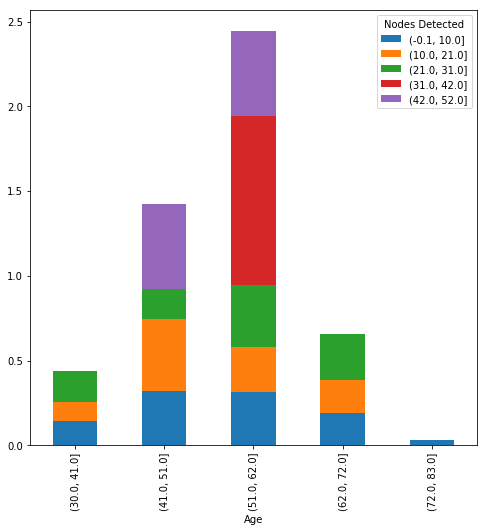

In [41]:
age_node_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

#The first table is a visualization of age vs. nodes.

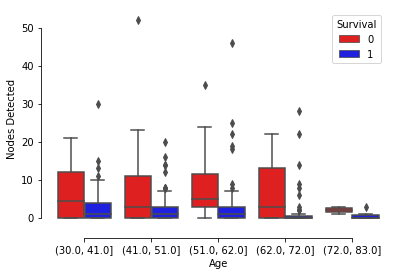

In [56]:
sns.boxplot(x=age_bins, y='Nodes Detected',
            hue="Survival", palette=["r", "b"],
            data=df)
sns.despine(offset=10, trim=True)

#Comparing age, number of nodes detected, and their relationship with survival.

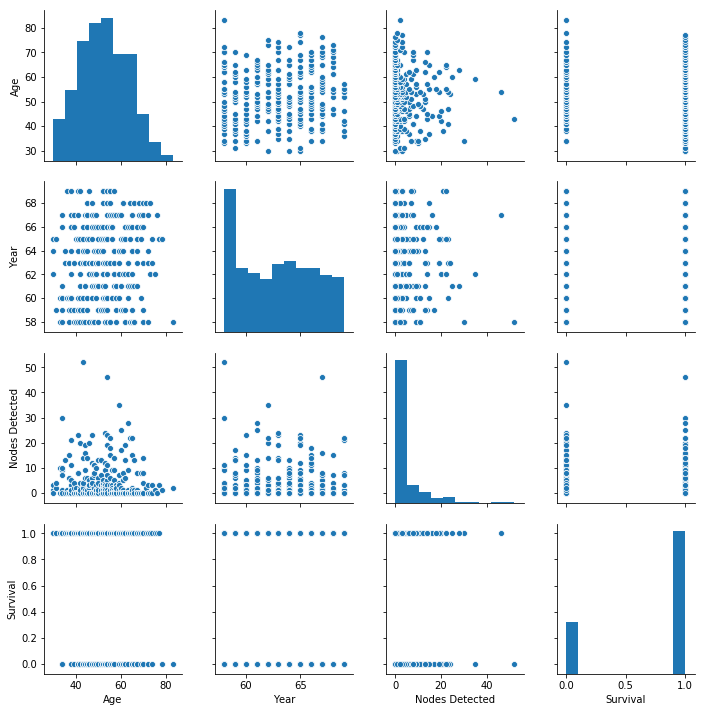

In [65]:
sns.pairplot(df)

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


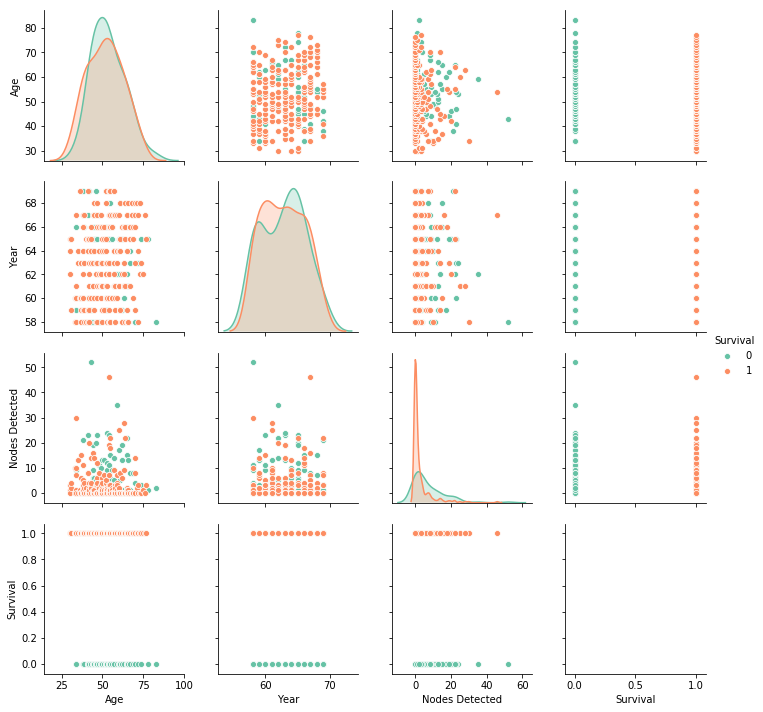

In [67]:
sns.pairplot(df, kind="scatter", hue="Survival", palette="Set2")


In [58]:
print(df.describe())

#Table of summary statistics.

              Age        Year  Nodes Detected    Survival
count  306.000000  306.000000      306.000000  306.000000
mean    52.457516   62.852941        4.026144    0.735294
std     10.803452    3.249405        7.189654    0.441899
min     30.000000   58.000000        0.000000    0.000000
25%     44.000000   60.000000        0.000000    0.000000
50%     52.000000   63.000000        1.000000    1.000000
75%     60.750000   65.750000        4.000000    1.000000
max     83.000000   69.000000       52.000000    1.000000


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival? **Fewer nodes detected  resulted in higher survival rates.**
- What is at least one feature that looks to have a negative relationship with survival? **Obviously more nodes had a negative relationship on survival. Older patients also had slightly lower suvival rates.**
- How are those two features related with each other, and what might that mean? **Middle aged patients seemed to have the highest number of nodes, and their survival rate followed a standard deviation. Maybe this has to do with younger and older patients having more comorbidites.**

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.